In [1]:
import pandas as pd
import numpy as np
from twarc import Twarc
import constants as cnst
from newspaper import Article, ArticleException
from tqdm import tqdm
import string
import matplotlib.pylab as plt
import requests


In [2]:
# dataframe = pd.read_csv("./Organic_extended.csv", index_col=0) 
dataframe = pd.read_csv("./Organic_extended_complete_v2.csv", sep="|", index_col=0) 
print(len(dataframe))
dataframe[['screen_name','tweet_id']].groupby('screen_name').count()

40667


,tweet_id
screen_name,
ABC News,3535
CNN,3905
Fox News,285
HuffPost,1241
Los Angeles Times,4535
NBC News,2464
NPR,1282
Reuters,10400
TIME,2117


In [3]:
dataframe['user_id'].unique()

array([16664681., 28785486.,   759251.,   807095.,  5392522.,  3108351.,
       51241574., 14173315., 15754281., 14293310.,  1652541., 14511951.,
        2467791.,  1367531.,  6577642.])

## Checking the NaNs
Checking for NaNs specifically in title, content, url and expanded_url

In [4]:
condition = dataframe['expanded_url'].isnull()
print(len(dataframe), dataframe.loc[condition,['tweet_id']].count())

dataframe.loc[condition,['screen_name', 'tweet_id', 'title','content','expanded_url','url']].head(50)

40667 tweet_id    151
dtype: int64


,screen_name,tweet_id,title,content,expanded_url,url
28471,CNN,1272238633110601730,NaN,NaN,NaN,https://cnn.it/2YD9Jkl
28528,CNN,1272762601613729792,NaN,NaN,NaN,https://cnn.it/3hyI4cD
28533,CNN,1272770936597614592,NaN,NaN,NaN,https://cnn.it/3ecNXdO
28610,CNN,1273133547012993026,NaN,NaN,NaN,https://cnn.it/2YKWcqT
28614,CNN,1273141394975207428,NaN,NaN,NaN,https://cnn.it/30QvEas
28615,CNN,1273145112525189120,NaN,NaN,NaN,https://cnn.it/2UNaWUU
28659,CNN,1273269222135775232,NaN,NaN,NaN,https://cnn.it/2UQVwPs
28728,CNN,1273476346266750981,NaN,NaN,NaN,https://cnn.it/3ecAKS7
28835,CNN,1273854562592587778,NaN,NaN,NaN,https://cnn.it/2zJjZPm
28838,CNN,1273866880462270466,NaN,NaN,NaN,https://cnn.it/3dlJxA4


In [5]:
dataframe = dataframe.dropna(subset=['title', 'content', 'url', 'expanded_url'])
print(len(dataframe))
dataframe[['screen_name','tweet_id']].groupby('screen_name').count()

39289


,tweet_id
screen_name,
ABC News,3296
CNN,3564
Fox News,284
HuffPost,1237
Los Angeles Times,4282
NBC News,2430
NPR,1259
Reuters,10172
TIME,2010


## Checking Non parent URLS

In [6]:
valid = "|".join(["abcnews.go.com/","www.cnn.com","www.huffpost.com", "latimes.com", "nbcnews.com",
                  "npr.org","reuters.com", "time.com","apnews.com","nytimes.com","wsj.com","usnews.com",
                  "usatoday.com", "foxnews.com","washingtonpost.com"])
condition = ~dataframe['expanded_url'].str.contains(valid, regex=True)
print(len(dataframe))
dataframe.loc[condition, ['screen_name','url','tweet_id', 'expanded_url']]

# dataframe.loc[condition, ['screen_name','expanded_url']].groupby('screen_name').count()

39289


,screen_name,url,tweet_id,expanded_url
28472,NPR,https://trib.al/iwPEB4K,1272292418591830018,https://www.wbur.org/hereandnow/2020/06/12/mer...
28473,NPR,https://trib.al/gcQSrOw,1272374700723879938,https://www.wbur.org/hereandnow/2020/06/12/kar...
28474,NPR,https://trib.al/U9Jpgp0,1272389970280448014,https://www.wbur.org/onlyagame/2020/06/12/hbcu...
28476,NPR,https://trib.al/TFcq7h2,1272405288147202048,https://www.wbur.org/hereandnow/2020/06/08/sar...
28477,CNN,https://cnn.it/3e3F6uM,1272408769578795010,https://edition.cnn.com/2020/06/14/world/nasa-...
...,...,...,...,...
40549,NBC News,https://bit.ly/3gRQpai,1283041474683248641,https://www.facebook.com/NBCNews/videos/757268...
40638,NBC News,https://bit.ly/30HuFZQ,1272528337882304517,https://www.facebook.com/NBCNews/videos/204917...
40649,Fox News,https://fxn.ws/2Y5n7OO,1272885314198085632,https://www.foxbusiness.com/markets/us-stocks-...
40652,ABC News,https://abcn.ws/37uK7Kq,1272892002569502722,https://fivethirtyeight.com/features/how-to-re...


Removing non Parent

In [7]:
dataframe.loc[condition, 'expanded_url']= np.nan
dataframe = dataframe.dropna(subset=['expanded_url'])
print(len(dataframe))
dataframe.loc[condition, ['screen_name','url', 'expanded_url']]

dataframe[['screen_name','tweet_id']].groupby('screen_name').count()

38694


,tweet_id
screen_name,
ABC News,3196
CNN,3396
Fox News,282
HuffPost,1237
Los Angeles Times,4264
NBC News,2330
NPR,1193
Reuters,10150
TIME,1947


## Checking Title

mean    11.073681
amin     1.000000
amax    27.000000
Name: title_len, dtype: float64
Empty DataFrame
Columns: [tweet_id, title]
Index: []


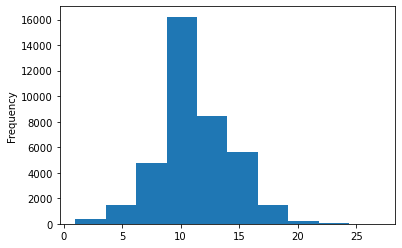

In [8]:
dataframe['title_len'] = dataframe['title'].str.split().str.len()
print(dataframe['title_len'].aggregate([np.mean, np.min, np.max]))
dataframe['title_len'].plot.hist(bins=10)
print(dataframe.loc[dataframe['title_len']==0, ['tweet_id','title']])
# length = dataframe['content'].str.len()
# length.min(), length.max(), length.mean()

## Checking content

mean      726.547914
amin        6.000000
amax    17822.000000
Name: content_len, dtype: float64


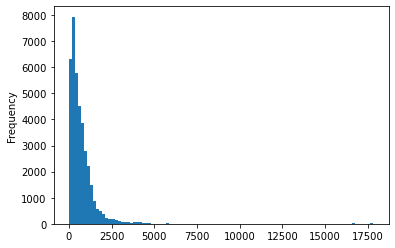

In [9]:
dataframe['content_len'] = dataframe['content'].str.split().str.len()
print(dataframe['content_len'].aggregate([np.mean, np.min, np.max]))
dataframe['content_len'].plot.hist(bins=100)

Removing by title

In [10]:
condition = dataframe['title_len'] < 3
dataframe.loc[condition,['screen_name','tweet_id', 'title','url', 'title_len','content_len', ]].head(30)
# dataframe.loc[condition,['screen_name','title']].groupby('screen_name').count()

,screen_name,tweet_id,title,url,title_len,content_len
3388,Reuters,1273689796230230016,India-China clash,https://reut.rs/3efViJx,2,1533
3807,Reuters,1273869022363136000,India-China clash,https://reut.rs/2Ch553H,2,1533
3866,Reuters,1273888047122264064,India-China clash,https://reut.rs/2Na1BlT,2,1533
3907,Reuters,1273900464749379585,India-China clash,https://reut.rs/3eswtKB,2,1533
4015,Reuters,1273933344280109056,India-China clash,https://reut.rs/2N7lUAu,2,1533
4136,Reuters,1273960301835190273,India-China clash,https://reut.rs/3emn6fq,2,1533
10246,The Wall Street Journal,1274258189370998784,MAGA—for All,https://on.wsj.com/2BjeFCX,2,86
13297,Los Angeles Times,1276234170344321025,Plants,https://www.latimes.com/topic/plants,1,52
28479,ABC News,1272413990795251714,ABC News,https://abcn.ws/2MYWmpe,2,29
28514,ABC News,1272650864818360320,ABC News,https://abcn.ws/2UOu5pD,2,29


Found legit title names like India-china clash for low title range. The one pointing to invalid content will be removed based on the content len. removing nothing based on title

Removing based on content len

In [11]:
condition = (dataframe['content_len'] <50)
dataframe.loc[condition, ['screen_name','tweet_id','url','title_len','content_len','content']].tail(30)
# dataframe.loc[condition, ['screen_name','tweet_id']].groupby('screen_name').count()

,screen_name,tweet_id,url,title_len,content_len,content
39263,ABC News,1282736820648914944,https://abcn.ws/2WeGROO,3,30,Highlighting the efforts of some of the countr...
39326,ABC News,1282746741809446915,https://abcn.ws/38TaE4F,10,26,“Operation Legend” is aimed at sending federal...
39359,CNN,1282754187172995072,https://cnn.it/38SSqQJ,10,16,Chat with us in Facebook Messenger. Find out w...
39373,ABC News,1282755948185100288,https://abcn.ws/2WgVgKl,4,32,More record heat will continue in the South an...
39417,ABC News,1282765460195487745,https://abcn.ws/304ddgm,3,30,Highlighting the efforts of some of the countr...
39446,ABC News,1282772301361053697,https://abcn.ws/2ZmPskv,2,29,External links are provided for reference purp...
39578,The New York Times,1282796975864324097,https://nyti.ms/30df4j8,8,35,Getty Images\n\nThe Cleveland Indians could be...
39628,USA TODAY,1282808313810280448,https://profile.usatoday.com/newsletters/The-S...,3,30,What happened today? We make the long story sh...
39679,ABC News,1282822029213863942,https://abcn.ws/3j19UiI,2,29,External links are provided for reference purp...
39694,ABC News,1282826707838410752,https://abcn.ws/2ZoGJy2,2,29,External links are provided for reference purp...


Analysis reveals that these are either video posts, or homepage links, weather forecasts, link to embeded pfd, a post with embedded tweets, also includes some reuters post with one para data.

In [12]:
dataframe.loc[condition, 'content'] = np.nan
dataframe = dataframe.dropna()
print(len(dataframe))
dataframe[['screen_name','6']].groupby('screen_name')['6'].count()

37857


screen_name
ABC News                    2868
CNN                         3338
Fox News                     282
HuffPost                    1221
Los Angeles Times           4226
NBC News                    2172
NPR                         1192
Reuters                    10069
TIME                        1945
The Associated Press         951
The New York Times          2179
The Wall Street Journal     2418
The Washington Post         2546
U.S. News                    781
USA TODAY                   1669
Name: 6, dtype: int64

In [16]:
dataframe.to_csv("./Organic_extended_finalv4.csv", sep="|") 

mean    11.179227
amin     1.000000
amax    27.000000
Name: title_len, dtype: float64
Empty DataFrame
Columns: [tweet_id, title]
Index: []


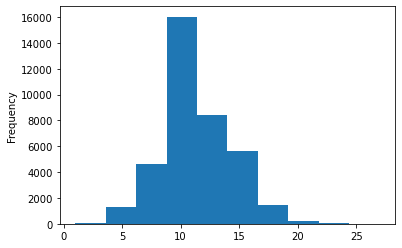

In [17]:
dataframe['title_len'] = dataframe['title'].str.split().str.len()
print(dataframe['title_len'].aggregate([np.mean, np.min, np.max]))
dataframe['title_len'].plot.hist(bins=10)
print(dataframe.loc[dataframe['title_len']==0, ['tweet_id','title']])

mean      741.906279
amin       50.000000
amax    17822.000000
Name: content_len, dtype: float64


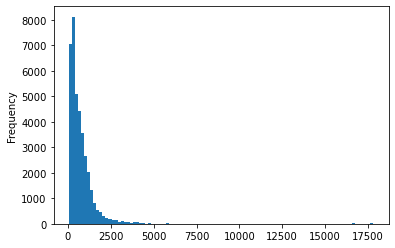

In [18]:
dataframe['content_len'] = dataframe['content'].str.split().str.len()
print(dataframe['content_len'].aggregate([np.mean, np.min, np.max]))
dataframe['content_len'].plot.hist(bins=100)

In [38]:
len(dataframe)

28471

In [57]:
dataframe = dataframe.dropna()
len(dataframe)

28471